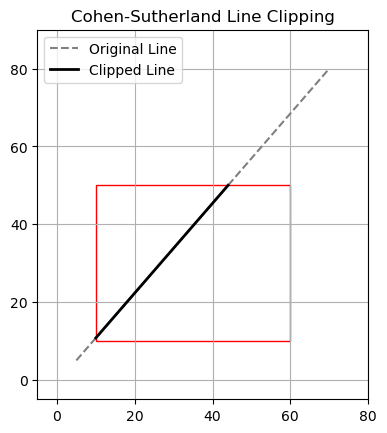

In [2]:
import matplotlib.pyplot as plt

# Define region codes
INSIDE = 0  # 0000
LEFT   = 1  # 0001
RIGHT  = 2  # 0010
BOTTOM = 4  # 0100
TOP    = 8  # 1000

# Compute region code for a point (x, y)
def compute_code(x, y, xmin, xmax, ymin, ymax):
    code = INSIDE
    if x < xmin:
        code |= LEFT
    elif x > xmax:
        code |= RIGHT
    if y < ymin:
        code |= BOTTOM
    elif y > ymax:
        code |= TOP
    return code

# Cohen-Sutherland algorithm
def cohen_sutherland_clip(x1, y1, x2, y2, xmin, xmax, ymin, ymax):
    code1 = compute_code(x1, y1, xmin, xmax, ymin, ymax)
    code2 = compute_code(x2, y2, xmin, xmax, ymin, ymax)

    accept = False

    while True:
        if code1 == 0 and code2 == 0:
            # Both points inside
            accept = True
            break
        elif (code1 & code2) != 0:
            # Both points share an outside zone
            break
        else:
            # At least one point is outside
            x, y = 0, 0
            out_code = code1 if code1 != 0 else code2

            if out_code & TOP:
                x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
                y = ymax
            elif out_code & BOTTOM:
                x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
                y = ymin
            elif out_code & RIGHT:
                y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
                x = xmax
            elif out_code & LEFT:
                y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
                x = xmin

            # Replace point outside with intersection point
            if out_code == code1:
                x1, y1 = x, y
                code1 = compute_code(x1, y1, xmin, xmax, ymin, ymax)
            else:
                x2, y2 = x, y
                code2 = compute_code(x2, y2, xmin, xmax, ymin, ymax)

    if accept:
        return x1, y1, x2, y2
    else:
        return None

# Plot the clipping window and the line
def draw_clip(x1, y1, x2, y2, xmin, xmax, ymin, ymax):
    result = cohen_sutherland_clip(x1, y1, x2, y2, xmin, xmax, ymin, ymax)

    fig, ax = plt.subplots()
    ax.set_title("Cohen-Sutherland Line Clipping")

    # Draw clipping rectangle
    rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Draw original line in gray
    ax.plot([x1, x2], [y1, y2], 'gray', linestyle='dashed', label='Original Line')

    # Draw clipped line in black
    if result:
        x1_clip, y1_clip, x2_clip, y2_clip = result
        ax.plot([x1_clip, x2_clip], [y1_clip, y2_clip], 'black', linewidth=2, label='Clipped Line')

    ax.set_xlim(min(x1, x2, xmin) - 10, max(x1, x2, xmax) + 10)
    ax.set_ylim(min(y1, y2, ymin) - 10, max(y1, y2, ymax) + 10)
    ax.grid(True)
    ax.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig("Cohen-Sutherland Line Clipping Algorithm.jpg")
    plt.show()

# Example usage
x1, y1 = 5, 5
x2, y2 = 70, 80
xmin, xmax = 10, 60
ymin, ymax = 10, 50

draw_clip(x1, y1, x2, y2, xmin, xmax, ymin, ymax)
